In [1]:
# Install TensorFlow
import tensorflow as tf

In [2]:
# Define Constants
batch_size = 128
num_classes = 10
epochs = 100

In [6]:
# Load MNIST data, split between train and test sets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

5
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [7]:
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
# Build the tf.keras.Sequential model by stacking layers.
# https://www.tensorflow.org/tutorials/quickstart/beginner
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Save the best model as digits_model.h5
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('digits_model.h5', save_best_only=True)

# Define a callback to monitor val_loss
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                       patience=5)

In [10]:
# Train the model using the early stopping callback
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[monitor_val_lose,modelCheckpoint])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4137 - accuracy: 0.8819 - val_loss: 0.1959 - val_accuracy: 0.9424
Epoch 2/100
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1916 - accuracy: 0.9450 - val_loss: 0.1357 - val_accuracy: 0.9598
Epoch 3/100
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1433 - accuracy: 0.9582 - val_loss: 0.1111 - val_accuracy: 0.9652
Epoch 4/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1185 - accuracy: 0.9653 - val_loss: 0.1006 - val_accuracy: 0.9693
Epoch 5/100
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0975 - accuracy: 0.9710 - val_loss: 0.0890 - val_accuracy: 0.9735
Epoch 6/100
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0887 - accuracy: 0.9731 - val_loss: 0.0794 - val_accuracy: 0.9755
Epoch 7/100
60000/60000 [=========================

10000/1 - 0s - loss: 0.0334 - accuracy: 0.9807


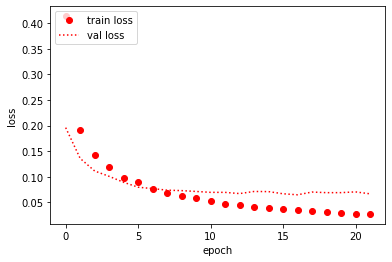

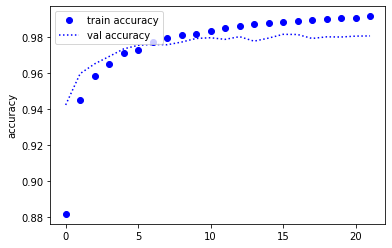

In [12]:
# Show History
model.evaluate(x_test,  y_test, verbose=2)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [13]:
# Predict Model
import numpy as np
selected_digit = 0

result = model.predict(np.array([x_test[selected_digit]]))
result_number = np.argmax(result)
y_test_digit = y_test[selected_digit]
y_test_number = np.argmax(y_test_digit)
print(result, result_number)
print(y_test_digit, y_test_number)

[[3.02932179e-10 8.90233362e-13 2.76245544e-07 1.03778439e-04
  1.06505476e-13 6.10831996e-10 6.28109672e-18 9.99895811e-01
  2.42512099e-09 8.03955658e-08]] 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7


[3.0293218e-10, 8.9023336e-13, 2.7624554e-07, 0.00010377844, 1.06505476e-13, 6.10832e-10, 6.2810967e-18, 0.9998958, 2.425121e-09, 8.0395566e-08]


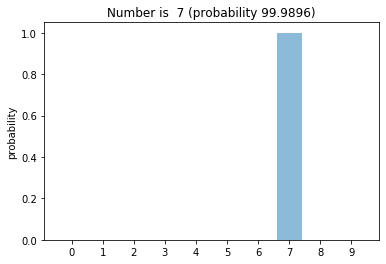

In [14]:
# Show Predicted Number
digits = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
y_pos = np.arange(len(digits))
performance = [ val for val in result[0]]
print(performance)
result_probability = performance[result_number]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, digits)
plt.ylabel('probability')
plt.title('Number is %2i (probability %7.4f)' % (result_number, result_probability*100))

plt.show()

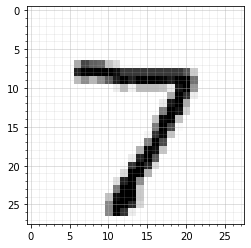

In [15]:
# Draw digit image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 29, 5)
minor_ticks = np.arange(0, 29, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.imshow(x_test[selected_digit], cmap=plt.cm.binary)

plt.show()

In [16]:
print(x_test[selected_digit])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    